In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163484 sha256=bca9acf47a1d0de4b0aa6c79ffe685651563f1be74eef0294516be4169aab420
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import seaborn as sns
from surprise import Dataset
from surprise import SVD, SVDpp
import matplotlib.pyplot as plt
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [ ]:
data = Dataset.load_builtin(name='ml-100k')

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
SVDmod = SVD()
SVDppmod = SVDpp()

SVDcv = cross_validate(SVDmod, data, measures=['RMSE'], cv=5, verbose=True)
SVDppcv = cross_validate(SVDppmod, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9384  0.9329  0.9400  0.9348  0.9274  0.9347  0.0044  
Fit time          1.55    1.48    1.45    2.26    1.75    1.70    0.30    
Test time         0.14    0.23    0.36    0.21    0.24    0.24    0.07    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9179  0.9127  0.9239  0.9229  0.9199  0.9195  0.0040  
Fit time          26.98   26.57   27.10   32.73   27.97   28.27   2.27    
Test time         4.38    4.51    5.77    4.98    5.94    5.12    0.64    


In [ ]:
print("Результати SVD: ", SVDcv['test_rmse'].mean())
print(" ")
print("Результати SVDpp: ", SVDppcv['test_rmse'].mean())

Результати SVD:  0.9347196317780367
 
Результати SVDpp:  0.9194639707948797


In [ ]:
#SVDpp має менший RMSE, а отже є оптимальним

In [ ]:
rmseValues = {'SVD': SVDcv['test_rmse'], 'SVD++': SVDppcv['test_rmse']}
dfRmse = pd.DataFrame(rmseValues)

<Figure size 1000x1000 with 0 Axes>

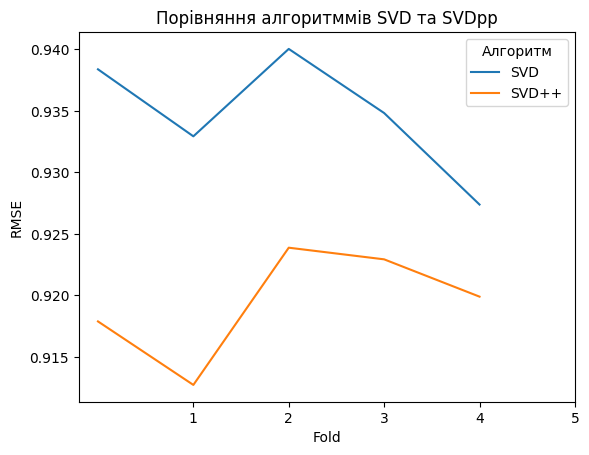

In [ ]:
plt.figure(figsize=(10, 10))
dfRmse.plot()
plt.title('Порівняння алгоритммів SVD та SVDpp')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(range(1, 6))
plt.legend(title='Алгоритм')
plt.show()

In [ ]:
#Висновок: алгоритм SVD++ виявився кращим за SVD завдяки меншому RMSE. Різниця гарно зображена на графіку. За допомогою кросс-валідації можна швидко зрозуміти, який алгоритмм підходить краще за всі.